In [2]:
import numpy as np
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F


In [4]:
class RNN(d2l.Module):  #@save
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [6]:
class RNNLM(d2l.RNNLMScratch):  #@save
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

In [7]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)

model.predict('it has', 20, data.vocab)

'it hasriirchrcirccfcforiir'

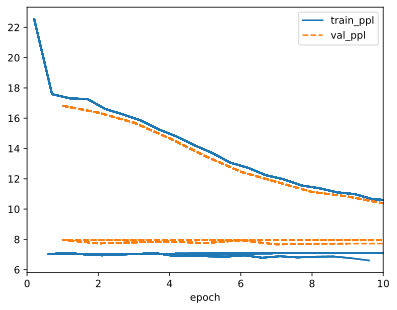

In [9]:
trainer = d2l.Trainer(max_epochs=10, gradient_clip_val=1, num_gpus=1)

trainer.fit(model, data)

In [11]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has in the time the the'

# Backprop through time